<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Cleaning_Data_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# Load  
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
install.packages("data.table")
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




# Importing and analyzing variable data types

Downloaded from https://assets.datacamp.com/production/repositories/5698/datasets/5d0ed31a0b5c3a63a75cfca7d12c7f7fec1c7521/bike_share_rides_ch1_1.rds

In [ ]:
bike_share_rides = readRDS('/content/bike_share_rides_ch1_1.rds')

str(bike_share_rides)
head(bike_share_rides,2)

tibble [35,229 × 10] (S3: tbl_df/tbl/data.frame)
 $ ride_id        : int [1:35229] 52797 54540 87695 45619 70832 96135 29928 83331 72424 25910 ...
 $ date           : chr [1:35229] "2017-04-15" "2017-04-19" "2017-04-14" "2017-04-03" ...
 $ duration       : chr [1:35229] "1316.15 minutes" "8.13 minutes" "24.85 minutes" "6.35 minutes" ...
 $ station_A_id   : num [1:35229] 67 21 16 58 16 6 5 16 5 81 ...
 $ station_A_name : chr [1:35229] "San Francisco Caltrain Station 2  (Townsend St at 4th St)" "Montgomery St BART Station (Market St at 2nd St)" "Steuart St at Market St" "Market St at 10th St" ...
 $ station_B_id   : num [1:35229] 89 64 355 368 81 66 350 91 62 81 ...
 $ station_B_name : chr [1:35229] "Division St at Potrero Ave" "5th St at Brannan St" "23rd St at Tennessee St" "Myrtle St at Polk St" ...
 $ bike_id        : num [1:35229] 1974 860 2263 1417 507 ...
 $ user_gender    : chr [1:35229] "Male" "Male" "Male" "Male" ...
 $ user_birth_year: num [1:35229] 1972 1986 1993 1981 1981 ..

ride_id,date,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_gender,user_birth_year
<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
52797,2017-04-15,1316.15 minutes,67,San Francisco Caltrain Station 2 (Townsend St at 4th St),89,Division St at Potrero Ave,1974,Male,1972
54540,2017-04-19,8.13 minutes,21,Montgomery St BART Station (Market St at 2nd St),64,5th St at Brannan St,860,Male,1986


# 1) Data Type constraints

## From numeric to factor

In [ ]:
# Summary of user_birth_year
summary(bike_share_rides$user_birth_year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1900    1979    1986    1984    1991    2001 

user_birth_year may not be useful as numeric. That's why it will be used to transform as a factor (categorical variable)

In [ ]:
# Convert user_birth_year to factor: user_birth_year_fct
bike_share_rides <- bike_share_rides %>%
  mutate(user_birth_year_fct = as.factor(user_birth_year))

# Summary of user_birth_year_fct
summary(bike_share_rides$user_birth_year_fct)

1900 1902 1923 1931 1938 1939 1941 1942 1943 1945 1946 1947 1948 1949 1950 1951 
   1    7    2   23    2    1    3   10    4   16    5   24    9   30   37   25 
1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 
  70   49   65   66  112   62  156   99  196  161  256  237  245  349  225  363 
1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 
 365  331  370  548  529  527  563  601  481  541  775  876  825 1016 1056 1262 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
1157 1318 1606 1672 2135 1872 2062 1582 1703 1498 1476 1185  813  358  365  348 
2000 2001 
 473   30

## From string to numeric (trimming) Using stringr library

In [ ]:
bike_share_rides$duration[1]

[1] "1316.15 minutes"

We need to trimm word "minutes" to just leave numeric value.

In [ ]:
library(stringr)

In [ ]:
bike_share_rides <- bike_share_rides %>%
  # Remove 'minutes' from duration: duration_trimmed
  mutate(duration_mins = as.numeric(str_remove(duration, "minutes")))

# Calculate mean duration
mean(bike_share_rides$duration_mins)

[1] 13.06214

# 2) Range constrains

Handling out of range values

In [ ]:
# Check minimum and max of duration
summary(bike_share_rides$duration_mins)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.02    6.78    9.83   13.06   14.22 1316.15 

If values were out of range, we can:

- Remove rows

- Treat as NA and then impute 

- Replace out of range values with the range limit.

- Other number based on domain knowledge.

Let's say in practice there can't be a bike rented more than 20 hours or 1200 minutes of duration.

## Checking limits with filter

In [ ]:
# Are there observations with a duration higher than 1200?
bike_share_rides %>%
  filter(duration_mins>1200 | duration_mins<0) %>%
  count()

n
<int>
2


## Checking value limits with assertive library

In [ ]:
install.packages("assertive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertive.base’, ‘assertive.properties’, ‘assertive.types’, ‘assertive.numbers’, ‘assertive.strings’, ‘assertive.datetimes’, ‘assertive.files’, ‘assertive.sets’, ‘assertive.matrices’, ‘assertive.models’, ‘assertive.data’, ‘assertive.data.uk’, ‘assertive.data.us’, ‘assertive.reflection’, ‘assertive.code’




In [ ]:
library(assertive)

assert_all_are_in_closed_range(bike_share_rides$duration_mins,lower=0, upper=1200)

ERROR: ignored

## Using replace

replace(variable, condition, new value)

Now we replace those 2 observations out of range with limit values

In [ ]:
# duration_min_const: replace vals of duration_min > 1200 with 1200
bike_share_rides <- bike_share_rides %>%
  mutate(duration_min_const = replace(duration_mins, duration_mins > 1200, 1200))


In [ ]:
str(bike_share_rides)

tibble [35,229 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id            : int [1:35229] 52797 54540 87695 45619 70832 96135 29928 83331 72424 25910 ...
 $ date               : chr [1:35229] "2017-04-15" "2017-04-19" "2017-04-14" "2017-04-03" ...
 $ duration           : chr [1:35229] "1316.15 minutes" "8.13 minutes" "24.85 minutes" "6.35 minutes" ...
 $ station_A_id       : num [1:35229] 67 21 16 58 16 6 5 16 5 81 ...
 $ station_A_name     : chr [1:35229] "San Francisco Caltrain Station 2  (Townsend St at 4th St)" "Montgomery St BART Station (Market St at 2nd St)" "Steuart St at Market St" "Market St at 10th St" ...
 $ station_B_id       : num [1:35229] 89 64 355 368 81 66 350 91 62 81 ...
 $ station_B_name     : chr [1:35229] "Division St at Potrero Ave" "5th St at Brannan St" "23rd St at Tennessee St" "Myrtle St at Polk St" ...
 $ bike_id            : num [1:35229] 1974 860 2263 1417 507 ...
 $ user_gender        : chr [1:35229] "Male" "Male" "Male" "Male" ...
 $ user_birth_year    : n

## Date limits using lubridate

In [ ]:
library(lubridate)
# Convert date to Date type
bike_share_rides <- bike_share_rides %>%
  mutate(date = as.Date(date))

# Filter for rides that occurred before or on today's date
bike_share_rides_past <- bike_share_rides %>%
  filter(date <= today())

# Make sure all dates from bike_share_rides_past are in the past
assert_all_are_in_past(bike_share_rides_past$date)

Warning message:
“Coercing bike_share_rides_past$date to class ‘POSIXct’.”


# 3) Uniqueness constraints (duplicated data)

## Full duplicates

duplicated() to detect duplicated rows.

The distinct() function from dplyr will remove the duplicates, keeping only the first instance.

In [ ]:
# Count the number of full duplicates
sum(duplicated(bike_share_rides))

# Remove duplicates
bike_share_rides_unique <- distinct(bike_share_rides)

[1] 0

## Partial duplicates

Some columns may be different

In [ ]:
# Find duplicated ride_ids
bike_share_rides %>% 
  # Count the number of occurrences of each ride_id
  count(ride_id) %>% 
  # Filter for rows with a count > 1
  filter(n > 1)

ride_id,n
<int>,<int>


### Removing partial duplicates

.keep_all = TRUE means we keep all columns in dataframe.

In [ ]:
# Remove full and partial duplicates
bike_share_rides_unique <- bike_share_rides %>%
  # Only based on ride_id instead of all cols
  distinct(ride_id, .keep_all = TRUE)

In [ ]:
# Remove full and partial duplicates base on two columns
bike_share_rides_unique <- bike_share_rides %>%
  # base on ride_id and station_A_id 
  distinct(ride_id, station_A_id, .keep_all = TRUE)


### Aggregating partial duplicates
Another way of handling partial duplicates is to compute a summary statistic of the values that differ between partial duplicates, such as mean, median, maximum, or minimum. This can come in handy when you're not sure how your data was collected and want an average, or if based on domain knowledge, you'd rather have too high of an estimate than too low of an estimate (or vice versa).

In [ ]:
bike_share_rides %>%
  # Group by ride_id and date
  group_by(ride_id, date) %>%
  # Add duration_min_avg column
  mutate(duration_min_avg = mean(duration_min)) %>%
  # Remove duplicates based on ride_id and date, keep all cols
  distinct(ride_id, date, .keep_all = TRUE) %>%
  # Remove duration_min column
  select(-duration_min)

# 4) Checking membership

A valur that does not represent de set of possible factors.

https://assets.datacamp.com/production/repositories/5698/datasets/d3e478e1482be254e824a801e18996ca482a6878/sfo_survey_ch2_1.rds

In [ ]:
sfo_survey = readRDS('/content/sfo_survey_ch2_1.rds')

str(sfo_survey)
head(sfo_survey,2)

'data.frame':	2809 obs. of  12 variables:
 $ id           : int  1842 1844 1840 1837 1833 3010 1838 1845 2097 1846 ...
 $ day          : chr  "Monday" "Monday" "Monday" "Monday" ...
 $ airline      : chr  "TURKISH AIRLINES" "TURKISH AIRLINES" "TURKISH AIRLINES" "TURKISH AIRLINES" ...
 $ destination  : chr  "ISTANBUL" "ISTANBUL" "ISTANBUL" "ISTANBUL" ...
 $ dest_region  : chr  "Middle East" "Middle East" "Middle East" "Middle East" ...
 $ dest_size    : chr  "Hub" "Hub" "Hub" "Hub" ...
 $ boarding_area: chr  "Gates 91-102" "Gates 91-102" "Gates 91-102" "Gates 91-102" ...
 $ dept_time    : chr  "2018-12-31" "2018-12-31" "2018-12-31" "2018-12-31" ...
 $ wait_min     : num  255 315 165 225 175 ...
 $ cleanliness  : chr  "Average" "Somewhat clean" "Average" "Somewhat clean" ...
 $ safety       : chr  "Neutral" "Somewhat safe" "Somewhat safe" "Somewhat safe" ...
 $ satisfaction : chr  "Somewhat satsified" "Somewhat satsified" "Somewhat satsified" "Somewhat satsified" ...


,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1842,Monday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,255,Average,Neutral,Somewhat satsified
2,1844,Monday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,315,Somewhat clean,Somewhat safe,Somewhat satsified


## Membership control on dest_size

In [ ]:
# Count the number of occurrences of dest_size
sfo_survey %>%
  count(dest_size)

dest_size,n
<chr>,<int>
Small,1
Hub,1
Hub,1756
Large,143
Large,1
Medium,682
Small,225


Anti-joins can help you identify the rows that are causing issues, and semi-joins can remove the issue-causing rows.

In [ ]:
# Data Frame with factors
dest_size = c("Small", "Medium", "Large", "Hub")
id = c(1,2,3,4)

dest_sizes <- data.frame(dest_size, id)
dest_sizes

dest_size,id
<chr>,<dbl>
Small,1
Medium,2
Large,3
Hub,4


Anti-join to filter rows causing issues.

In [ ]:
# Find bad dest_size r  ows
sfo_survey %>% 
  # Join with dest_sizes data frame to get bad dest_size rows
  anti_join(dest_sizes, by = "dest_size")

id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
982,Friday,LUFTHANSA,MUNICH,Europe,Hub,Gates 91-102,2018-12-31,340,Average,Very safe,Neutral
2063,Thursday,AMERICAN,PHILADELPHIA,East US,Large,Gates 50-59,2018-12-31,117,Somewhat clean,Somewhat safe,Somewhat satsified
777,Thursday,UNITED INTL,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 91-102,2018-12-31,443,Somewhat clean,Somewhat safe,Somewhat satsified


Semi-join to drop rows.

In [ ]:
# Remove bad dest_size rows
sfo_survey %>% 
  # Join with dest_sizes
  semi_join(dest_sizes, by = "dest_size") %>%
  # Count the number of each dest_size
  count(dest_size)

dest_size,n
<chr>,<int>
Hub,1756
Large,143
Medium,682
Small,225


## Solving categorical data inconsistency white space

Seems the categories in dest_size have inconsistent white space.

In [ ]:
library(stringr)

# Add new columns to sfo_survey
sfo_survey <- sfo_survey %>%
  # dest_size_trimmed: dest_size without whitespace
  mutate(dest_size_trimmed = str_trim(dest_size))

## Solving categorical data inconsistency upper and lower cases

In [ ]:
library(stringr)

# Add new columns to sfo_survey
sfo_survey <- sfo_survey %>%
  # cleanliness_lower: cleanliness converted to lowercase
  mutate(cleanliness_lower = str_to_lower(cleanliness))

## Collapsing categories

In [ ]:
# Count categories of dest_region
sfo_survey %>%
  count(dest_region)

dest_region,n
<chr>,<int>
Asia,260
Australia/New Zealand,66
Canada/Mexico,220
Central/South America,29
East US,498
Europe,401
Middle East,79
Midwest US,281
West US,975


In [ ]:
library(forcats)

In [ ]:
# Categories to map to Europe
europe_categories <- c("EU", "eur", "Europ")

# Add a new col dest_region_collapsed
sfo_survey %>%
  # Map all categories in europe_categories to Europe
  mutate(dest_region_collapsed = fct_collapse(dest_region, 
                                              Europe = europe_categories)) %>%
  # Count categories of dest_region_collapsed
  count(dest_region_collapsed)

Warning message:
“Unknown levels in `f`: EU, eur, Europ”


dest_region_collapsed,n
<fct>,<int>
Asia,260
Australia/New Zealand,66
Canada/Mexico,220
Central/South America,29
East US,498
Europe,401
Middle East,79
Midwest US,281
West US,975


# 5) Cleaning text data

## Formatting inconsistencies

In [ ]:
str(sfo_survey)

'data.frame':	2809 obs. of  14 variables:
 $ id               : int  1842 1844 1840 1837 1833 3010 1838 1845 2097 1846 ...
 $ day              : chr  "Monday" "Monday" "Monday" "Monday" ...
 $ airline          : chr  "TURKISH AIRLINES" "TURKISH AIRLINES" "TURKISH AIRLINES" "TURKISH AIRLINES" ...
 $ destination      : chr  "ISTANBUL" "ISTANBUL" "ISTANBUL" "ISTANBUL" ...
 $ dest_region      : chr  "Middle East" "Middle East" "Middle East" "Middle East" ...
 $ dest_size        : chr  "Hub" "Hub" "Hub" "Hub" ...
 $ boarding_area    : chr  "Gates 91-102" "Gates 91-102" "Gates 91-102" "Gates 91-102" ...
 $ dept_time        : chr  "2018-12-31" "2018-12-31" "2018-12-31" "2018-12-31" ...
 $ wait_min         : num  255 315 165 225 175 ...
 $ cleanliness      : chr  "Average" "Somewhat clean" "Average" "Somewhat clean" ...
 $ safety           : chr  "Neutral" "Somewhat safe" "Somewhat safe" "Somewhat safe" ...
 $ satisfaction     : chr  "Somewhat satsified" "Somewhat satsified" "Somewhat satsifie

In [ ]:
# Filter for rows with "-" or "=" in the phone column
sfo_survey %>%
  filter(str_detect(boarding_area, fixed("-")) | str_detect(boarding_area, fixed("=")))

In [ ]:
?str_remove_all

### Removing symbols

In [ ]:
# Remove parentheses from phone column

sfo_no_hyphen = sfo_survey %>% 
  mutate(removed = str_remove_all(boarding_area, fixed("-")))

sfo_no_hyphen$removed

[1] "Gates 91102" "Gates 91102" "Gates 91102" "Gates 91102" "Gates 91102"
   [6] "Gates 5059"  "Gates 91102" "Gates 91102" "Gates 91102" "Gates 91102"
  [11] "Gates 91102" "Gates 91102" "Gates 91102" "Gates 91102" "Gates 91102"
  [16] "Gates 112"   "Gates 91102" "Gates 7090"  "Gates 112"   "Gates 91102"
  [21] "Gates 7090"  "Gates 5059"  "Gates 7090"  "Gates 6069"  "Gates 112"  
  [26] "Gates 91102" "Gates 6069"  "Gates 7090"  "Gates 2039"  "Gates 2039" 
  [31] "Gates 91102" "Gates 91102" "Gates 5059"  "Gates 2039"  "Gates 91102"
  [36] "Gates 91102" "Gates 91102" "Gates 5059"  "Gates 112"   "Gates 2039" 
  [41] "Gates 91102" "Gates 91102" "Gates 4048"  "Gates 112"   "Gates 7090" 
  [46] "Gates 112"   "Gates 7090"  "Gates 91102" "Gates 5059"  "Gates 91102"
  [51] "Gates 91102" "Gates 112"   "Gates 112"   "Gates 112"   "Gates 5059" 
  [56] "Gates 112"   "Gates 7090"  "Gates 7090"  "Gates 2039"  "Gates 7090" 
  [61] "Gates 2039"  "Gates 4048"  "Gates 6069"  "Gates 5059"  "Gates 5059" 
  [66] "Gates 5059"  "Gates 91102" "Gates 2039"  "Gates 112"   "Gates 91102"
  [71] "Gates 91102" "Gates 91102" "Gates 112"   "Gates 5059"  "Gates 5059" 
  [76] "Gates 5059"  "Gates 91102" "Gates 4048"  "Gates 2039"  "Gates 91102"
  [81] "Gates 5059"  "Gates 91102" "Gates 7090"  "Gates 7090"  "Gates 91102"
  [86] "Gates 91102" "Gates 7090"  "Gates 4048"  "Gates 2039"  "Gates 4048" 
  [91] "Gates 7090"  "Gates 5059"  "Gates 5059"  "Gates 5059"  "Gates 2039" 
  [96] "Gates 7090"  "Gates 91102" "Gates 4048"  "Gates 7090"  "Gates 7090" 
 [101] "Gates 4048"  "Gates 7090"  "Gates 2039"  "Gates 5059"  "Gates 7090" 
 [106] "Gates 7090"  "Gates 91102" "Gates 91102" "Gates 4048"  "Gates 91102"
 [111] "Gates 112"   "Gates 7090"  "Gates 91102" "Gates 5059"  "Gates 5059" 
 [116] "Gates 112"   "Gates 112"   "Gates 6069"  "Gates 112"   "Gates 91102"
 [121] "Gates 91102" "Gates 112"   "Gates 7090"  "Gates 2039"  "Gates 2039" 
 [126] "Gates 7090"  "Gates 112"   "Gates 112"   "Gates 4048"  "Gates 7090" 
 [131] "Gates 5059"  "Gates 2039"  "Gates 91102" "Gates 112"   "Gates 6069" 
 [136] "Gates 112"   "Gates 6069"  "Gates 91102" "Gates 5059"  "Gates 6069" 
 [141] "Gates 112"   "Gates 2039"  "Gates 112"   "Gates 5059"  "Gates 112"  
 [146] "Gates 6069"  "Gates 112"   "Gates 91102" "Gates 5059"  "Gates 2039" 
 [151] "Gates 91102" "Gates 5059"  "Gates 7090"  "Gates 112"   "Gates 91102"
 [156] "Gates 7090"  "Gates 112"   "Gates 5059"  "Gates 5059"  "Gates 112"  
 [161] "Gates 91102" "Gates 7090"  "Gates 2039"  "Gates 112"   "Gates 112"  
 [166] "Gates 112"   "Gates 7090"  "Gates 7090"  "Gates 91102" "Gates 112"  
 [171] "Gates 7090"  "Gates 91102" "Gates 7090"  "Gates 2039"  "Gates 7090" 
 [176] "Gates 5059"  "Gates 2039"  "Gates 91102" "Gates 91102" "Gates 112"  
 [181] "Gates 7090"  "Gates 2039"  "Gates 112"   "Gates 91102" "Gates 91102"
 [186] "Gates 5059"  "Gates 2039"  "Gates 6069"  "Gates 5059"  "Gates 7090" 
 [191] "Gates 112"   "Gates 112"   "Gates 7090"  "Gates 91102" "Gates 5059" 
 [196] "Gates 7090"  "Gates 112"   "Gates 112"   "Gates 112"   "Gates 112"  
 [201] "Gates 7090"  "Gates 91102" "Gates 91102" "Gates 91102" "Gates 91102"
 [206] "Gates 7090"  "Gates 6069"  "Gates 112"   "Gates 91102" "Gates 91102"
 [211] "Gates 4048"  "Gates 5059"  "Gates 7090"  "Gates 6069"  "Gates 5059" 
 [216] "Gates 112"   "Gates 6069"  "Gates 91102" "Gates 5059"  "Gates 7090" 
 [221] "Gates 7090"  "Gates 112"   "Gates 2039"  "Gates 7090"  "Gates 4048" 
 [226] "Gates 2039"  "Gates 5059"  "Gates 4048"  "Gates 2039"  "Gates 112"  
 [231] "Gates 5059"  "Gates 5059"  "Gates 2039"  "Gates 4048"  "Gates 7090" 
 [236] "Gates 5059"  "Gates 7090"  "Gates 2039"  "Gates 7090"  "Gates 6069" 
 [241] "Gates 5059"  "Gates 6069"  "Gates 112"   "Gates 4048"  "Gates 2039" 
 [246] "Gates 91102" "Gates 5059"  "Gates 5059"  "Gates 4048"  "Gates 7090" 
 [251] "Gates 5059"  "Gates 2039"  "Gates 5059"  "Gates 7090"  "Gates 91102"
 [256] "Gates 6069"  "Gates 5059"  "Gates 2039"  "Gates 2039"  "Gates 2039" 

### Replacing symbols

In [ ]:
# Add phone_no_parens as column
sfo_survey %>%
  mutate(boarding_area = str_replace_all(boarding_area, "-", " ")) %>%
  select(boarding_area, id) %>%
  head(2)

,boarding_area,id
,<chr>,<int>
1,Gates 91 102,1842
2,Gates 91 102,1844


### Checking id length (important with phones, zip codes, and others)

In [ ]:
# Check out the invalid numbers
sfo_survey %>%
  filter(str_length(id) != 4) %>%
  dim()

# Remove rows with invalid numbers
sfo_survey %>%
  filter(str_length(id) == 4) %>%
  dim()

[1] 674  14

[1] 2135   14

# 6) Uniformity

All values in the same unit of measure. We can use if else method

## Date Uniformity (parsing different formats)

In [ ]:
str(sfo_survey)

'data.frame':	2809 obs. of  14 variables:
 $ id               : int  1842 1844 1840 1837 1833 3010 1838 1845 2097 1846 ...
 $ day              : chr  "Monday" "Monday" "Monday" "Monday" ...
 $ airline          : chr  "TURKISH AIRLINES" "TURKISH AIRLINES" "TURKISH AIRLINES" "TURKISH AIRLINES" ...
 $ destination      : chr  "ISTANBUL" "ISTANBUL" "ISTANBUL" "ISTANBUL" ...
 $ dest_region      : chr  "Middle East" "Middle East" "Middle East" "Middle East" ...
 $ dest_size        : chr  "Hub" "Hub" "Hub" "Hub" ...
 $ boarding_area    : chr  "Gates 91-102" "Gates 91-102" "Gates 91-102" "Gates 91-102" ...
 $ dept_time        : chr  "2018-12-31" "2018-12-31" "2018-12-31" "2018-12-31" ...
 $ wait_min         : num  255 315 165 225 175 ...
 $ cleanliness      : chr  "Average" "Somewhat clean" "Average" "Somewhat clean" ...
 $ safety           : chr  "Neutral" "Somewhat safe" "Somewhat safe" "Somewhat safe" ...
 $ satisfaction     : chr  "Somewhat satsified" "Somewhat satsified" "Somewhat satsifie

In [ ]:
sfo_survey %>%
  mutate(date = as.Date(dept_time))

### accounts dataset

In [ ]:
accounts = readRDS("/content/ch3_1_accounts.rds")
head(accounts,2)

,id,date_opened,total
,<fct>,<chr>,<dbl>
1,A880C79F,2003-10-19,169305
2,BE8222DF,"October 05, 2018",107460


To parse dates we need 2 different formats

In [ ]:
# Define the date formats
formats <- c("%Y-%m-%d", "%B %d, %Y")

# Convert dates to the same format
accounts = accounts %>%
  mutate(date_opened_clean = parse_date_time(date_opened, orders = formats))

In [ ]:
str(accounts)

'data.frame':	98 obs. of  4 variables:
 $ id               : Factor w/ 100 levels "0128D2D0","02E63545",..: 67 76 13 64 96 84 39 26 35 16 ...
 $ date_opened      : chr  "2003-10-19" "October 05, 2018" "2008-07-29" "2005-06-09" ...
 $ total            : num  169305 107460 15297152 14897272 124568 ...
 $ date_opened_clean: POSIXct, format: "2003-10-19" "2018-10-05" ...


# 7) Cross field validation


## validating age of account with open date - today's date

In [ ]:
today()

[1] "2021-04-05"

In [ ]:
# Find invalid acct_age
accounts %>%
  # theoretical_age: age of acct based on date_opened
  mutate(theoretical_age = floor(as.numeric(date_opened_clean %--% today(), "years"))) %>%
  head(2)

,id,date_opened,total,date_opened_clean,theoretical_age
,<fct>,<chr>,<dbl>,<dttm>,<dbl>
1,A880C79F,2003-10-19,169305,2003-10-19,17
2,BE8222DF,"October 05, 2018",107460,2018-10-05,2


# 8) Missing data

In [ ]:
sum(is.na(sfo_survey))

[1] 572

In [ ]:
install.packages("visdat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



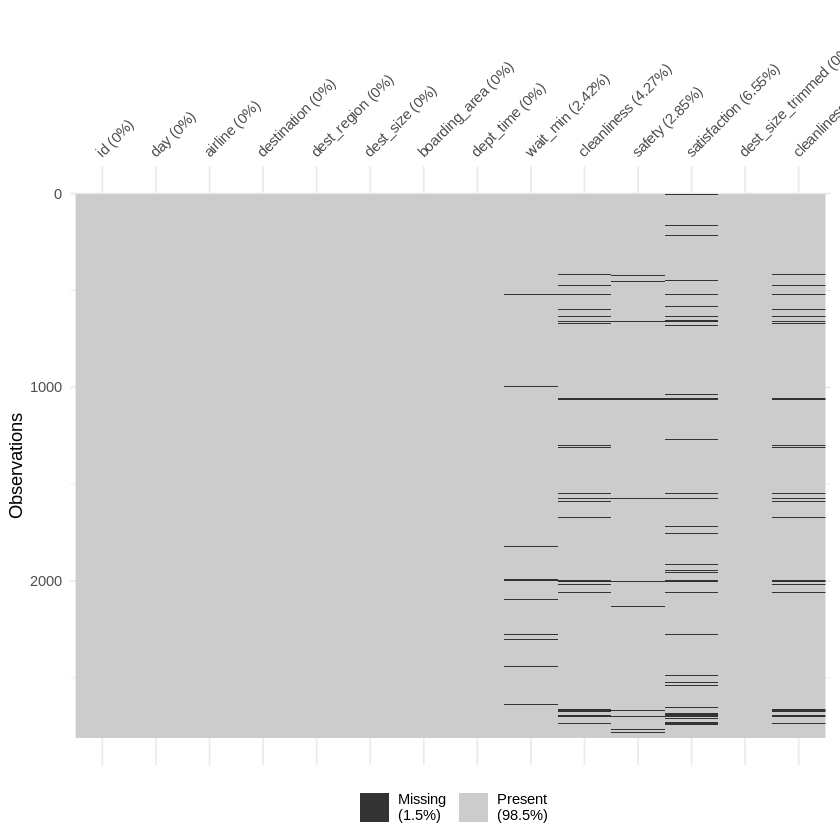

In [ ]:
library(visdat)
vis_miss(sfo_survey)

## Analyze: Missing ar random, Not ar random, completely at random?

- Missing completely at random: No systematic relationship between missing data and other values

- Missing at random: Systematic relationship between missing data and other OBSERVED variables.

- Missing Not at random: Systematic relationship between missing data and other UNOBSERVED variables.

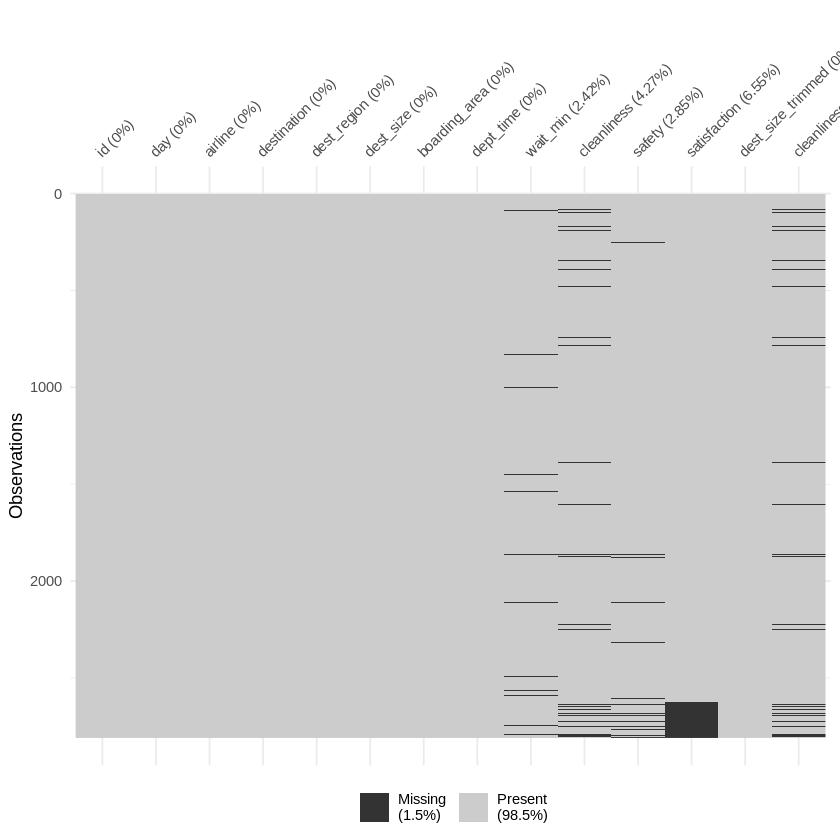

In [ ]:
# Sort by age and visualize missing vals
sfo_survey %>%
  arrange(satisfaction) %>%
  vis_miss()

There might be some relationship between observed values and NA values satisfaction.

Investigating summary statistics based on missingness is a great way to determine if data is missing completely at random or missing at random.

In [ ]:
# For example here I classify between satisfaction if NA and mean of waiting time
# There might be something to keep analyzing here:
sfo_survey %>%
  filter(!is.na(wait_min)) %>%
  mutate(sats = is.na(satisfaction)) %>%
  group_by(sats) %>% 
  summarize(mean_wait = mean(wait_min), sd_wait = sd(wait_min))

sats,mean_wait,sd_wait
<lgl>,<dbl>,<dbl>
FALSE,166.6088,108.3544
TRUE,199.9360,186.5975


## Drop (Filter to drop NAs)

In [ ]:
# Create accounts_clean
sfo_survey_na <- sfo_survey %>%
  # Filter to remove rows with missing cust_id
  filter(!is.na(satisfaction))

head(sfo_survey_na,2)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,dest_size_trimmed,cleanliness_lower
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1842,Monday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,255,Average,Neutral,Somewhat satsified,Hub,average
2,1844,Monday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,315,Somewhat clean,Somewhat safe,Somewhat satsified,Hub,somewhat clean


### Dropping and Impute with aggregated measure

ifelse(condition, val_if_true, val_if_false)

In [ ]:
# In this case impute with mean.
sfo_survey_na <- sfo_survey %>%
  filter(!is.na(satisfaction)) %>%
  mutate(mutated_mean = ifelse(is.na(wait_min), mean(wait_min, rm=TRUE), wait_min))

# 9) Membership problem in strings: Comparing Strings. Remaping using string distance

Damerau-Levenshtein distance is the minimum number of steps needed to get from String A to String B, using these operations:

Insertion of a new character.
Deletion of an existing character.
Substitution of an existing character.
Transposition of two existing consecutive characters.

In [5]:
install.packages("fuzzyjoin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘stringdist’, ‘geosphere’




In [6]:
library(fuzzyjoin)

## Zagat databse

The city column contains the name of the city that the restaurant is located in. However, there are a number of typos throughout the column. Your task is to map each city to one of the five correctly-spelled cities contained in the cities data frame.

In [8]:
zagat = readRDS("/content/zagat.rds")
str(zagat)

'data.frame':	310 obs. of  7 variables:
 $ id   : int  0 1 2 3 4 5 6 8 9 11 ...
 $ name : chr  "apple pan the" "asahi ramen" "baja fresh" "belvedere the" ...
 $ addr : chr  "10801 w. pico blvd." "2027 sawtelle blvd." "3345 kimber dr." "9882 little santa monica blvd." ...
 $ city : Factor w/ 26 levels "atlanta","los angeles",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ phone: Factor w/ 329 levels "100-813-8212",..: 143 145 312 155 139 96 323 125 150 132 ...
 $ type : chr  "american" "noodle shops" "mexican" "pacific new wave" ...
 $ class: int  534 535 536 537 538 539 540 542 543 545 ...


In [16]:
city_actual = c("new york","los angeles","atlanta","san francisco","las vegas")
cities = data.frame(city_actual)
cities

city_actual
<chr>
new york
los angeles
atlanta
san francisco
las vegas


## Fixing typos with string distance

In [17]:
# Count the number of each city variation
zagat %>%
  count(city)

# Join and look at results
zagat %>%
  # Left join based on stringdist using city and city_actual cols
  stringdist_left_join(cities, by = c("city" = "city_actual")) %>%
  # Select the name, city, and city_actual cols
  select(name, city, city_actual)

city,n
<fct>,<int>
atlanta,64
los angeles,72
new york,98
las vegas,26
san francisco,50


name,city,city_actual
<chr>,<fct>,<chr>
apple pan the,los angeles,los angeles
asahi ramen,los angeles,los angeles
baja fresh,los angeles,los angeles
belvedere the,los angeles,los angeles
benita's frites,los angeles,los angeles
bernard's,los angeles,los angeles
bistro 45,los angeles,los angeles
brighton coffee shop,los angeles,los angeles
bristol farms market cafe,los angeles,los angeles


# 10) When joins don't work because of difference in strings on keys.

#RECLIN library

Many times is needed to join data from multiple sources, but the key columns are written in different ways.

First we clean each dataset separately then we generate pairs, compare pairs of how similar they are, then we score each and complete the join.

Link or join?
Similar to joins, record linkage is the act of linking data from different sources regarding the same entity. But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.

## a) Generate pairs.

1- all row A with all rows B. But this technique is memory intensive.

2- Using "blocking". We only consider pairs when they agree on the blocking variable.

Zagat and Fodor's are both companies that gather restaurant reviews. The zagat and fodors datasets both contain information about various restaurants, including addresses, phone numbers, and cuisine types. Some restaurants appear in both datasets, but don't necessarily have the same exact name or phone number written down. In this chapter, you'll work towards figuring out which restaurants appear in both datasets.

In [24]:
fodors = readRDS("/content/fodors.rds")

str(fodors)

'data.frame':	533 obs. of  7 variables:
 $ id   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ name : chr  "arnie morton's of chicago" "art's delicatessen" "hotel bel-air" "cafe bizou" ...
 $ addr : chr  "435 s. la cienega blv ." "12224 ventura blvd." "701 stone canyon rd." "14016 ventura blvd." ...
 $ city : Factor w/ 5 levels "atlanta","los angeles",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ phone: chr  "310-246-1501" "818-762-1221" "310-472-1211" "818-788-3536" ...
 $ type : chr  "american" "american" "californian" "french" ...
 $ class: int  0 1 2 3 4 5 6 7 8 9 ...


In [19]:
install.packages("reclin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lvec’, ‘ldat’, ‘lpSolve’




### All pairs

In [25]:
# Load reclin
library(reclin)

# Generate all possible pairs
pair_blocking(zagat, fodors)

Simple blocking
  No blocking used.
  First data set:  310 records
  Second data set: 533 records
  Total number of pairs: 165 230 pairs

ldat with 165 230 rows and 2 columns
         x   y
1        1   1
2        2   1
3        3   1
4        4   1
5        5   1
6        6   1
7        7   1
8        8   1
9        9   1
10      10   1
:        :   :
165221 301 533
165222 302 533
165223 303 533
165224 304 533
165225 305 533
165226 306 533
165227 307 533
165228 308 533
165229 309 533
165230 310 533

### Blocking by city

In [ ]:
# Generate pairs with same city
pair_blocking(zagat, fodors, blocking_var = "city")

## b) Comparing pairs

Choosing a comparator and the columns to compare is highly dataset-dependent, so it's best to try out different combinations to see which works best on the dataset you're working with.

In [26]:
# Generate pairs
pair_blocking(zagat, fodors, blocking_var = "city") %>%
  # Compare pairs by name using lcs()
  compare_pairs(by = "name",
                default_comparator = lcs())

Compare
  By: name

Simple blocking
  Blocking variable(s): city
  First data set:  310 records
  Second data set: 533 records
  Total number of pairs: 40 532 pairs

ldat with 40 532 rows and 3 columns
        x   y      name
1       1   1 0.3157895
2       1   2 0.3225806
3       1   3 0.2307692
4       1   4 0.2608696
5       1   5 0.4545455
6       1   6 0.2142857
7       1   7 0.1052632
8       1   8 0.2222222
9       1   9 0.3000000
10      1  10 0.4516129
:       :   :         :
40523 310 414 0.3606557
40524 310 415 0.2631579
40525 310 416 0.2105263
40526 310 417 0.3750000
40527 310 418 0.2978723
40528 310 419 0.2727273
40529 310 420 0.3437500
40530 310 421 0.3414634
40531 310 422 0.4081633
40532 310 423 0.1714286

In [36]:
# Create pairs
pair_blocking(zagat, fodors, blocking_var = "city") %>%
  # Compare pairs. Here I add more variables
  compare_pairs(by = c("name", "addr", "type", "phone"), default_comparator = jaro_winkler()) %>%
  # Score pairs
  score_problink()

Compare
  By: name, addr, type, phone

Simple blocking
  Blocking variable(s): city
  First data set:  310 records
  Second data set: 533 records
  Total number of pairs: 40 532 pairs

ldat with 40 532 rows and 7 columns
        x   y      name      addr      type     phone     weight
1       1   1 0.4871062 0.5703661 1.0000000 0.6746032  2.9228878
2       1   2 0.5234025 0.6140351 1.0000000 0.5555556  2.6782262
3       1   3 0.4564103 0.5486355 0.5598485 0.7222222  0.9767931
4       1   4 0.5102564 0.6842105 0.5138889 0.6746032  1.3157859
5       1   5 0.5982906 0.5515351 1.0000000 0.5793651  2.8068054
6       1   6 0.3581197 0.4825911 0.5138889 0.6746032  0.2843276
7       1   7 0.0000000 0.5457762 0.5598485 0.6269841 -0.5482499
8       1   8 0.4256410 0.4979621 1.0000000 0.6269841  2.3494218
9       1   9 0.5013736 0.6342105 0.5598485 0.7777778  1.6582539
10      1  10 0.6011396 0.4654971 1.0000000 0.6746032  2.9709863
:       :   :         :         :         :         :          :

## c) Select pairs

Here we use more variables "name", "addr", "type", "phone" to compare and
jaro_winkler(0.9)

In [41]:
# Create pairs
pair_blocking(zagat, fodors, blocking_var = "city") %>%
  # Compare pairs
  compare_pairs(by = c("name", "addr", "type", "phone"), default_comparator = jaro_winkler(0.9)) %>%
  # Score pairs
  score_problink() %>%
  # Select pairs
  select_n_to_m()

Compare
  By: name, addr, type, phone

Simple blocking
  Blocking variable(s): city
  First data set:  310 records
  Second data set: 533 records
  Total number of pairs: 40 532 pairs

ldat with 40 532 rows and 8 columns
        x   y      name      addr      type     phone     weight select
1       1   1 0.4871062 0.5703661 1.0000000 0.6746032  2.9158846  FALSE
2       1   2 0.5234025 0.6140351 1.0000000 0.5555556  2.6626411  FALSE
3       1   3 0.4564103 0.5486355 0.5598485 0.7222222  1.0030760  FALSE
4       1   4 0.5102564 0.6842105 0.5138889 0.6746032  1.3486138  FALSE
5       1   5 0.5982906 0.5515351 1.0000000 0.5793651  2.7880263  FALSE
6       1   6 0.3581197 0.4825911 0.5138889 0.6746032  0.3026781  FALSE
7       1   7 0.0000000 0.5457762 0.5598485 0.6269841 -0.5212833  FALSE
8       1   8 0.4256410 0.4979621 1.0000000 0.6269841  2.3317791  FALSE
9       1   9 0.5013736 0.6342105 0.5598485 0.7777778  1.6941027  FALSE
10      1  10 0.6011396 0.4654971 1.0000000 0.6746032  2.95

## d) Link

Here I try a higher threshold inside select_n_to_m

In [45]:
# Create pairs
pair_blocking(zagat, fodors, blocking_var = "city") %>%
  # Compare pairs
  compare_pairs(by = c("name", "addr", "type", "phone"), default_comparator = jaro_winkler(0.9)) %>%
  # Score pairs
  score_problink() %>%
  # Select pairs
  select_n_to_m(threshold = 8) %>%
  link()

id.x,name.x,addr.x,city.x,phone.x,type.x,class.x,id.y,name.y,addr.y,city.y,phone.y,type.y,class.y
<int>,<chr>,<chr>,<fct>,<fct>,<chr>,<int>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
113,teresa's,80 montague st.,new york,718-520-2910,polish,647,358,teresa's,103 1st ave. between 6th and 7th sts .,new york,212-228-0604,east european,358
137,steakhouse the,128 e. fremont st.,las vegas,702-382-1600,steakhouses,671,428,binion's coffee shop,128 fremont st.,las vegas,702-382-1600,coffee shops/diners,428
138,stefano's,129 fremont st.,las vegas,702-385-7111,italian,672,442,lillie langtry's,129 e. fremont st.,las vegas,702-385-7111,asian,442
218,arnie morton's of chicago,435 s. la cienega blvd.,los angeles,310-246-1501,steakhouses,0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,310-246-1501,american,0
219,art's deli,12224 ventura blvd.,los angeles,818-762-1221,delis,1,1,art's delicatessen,12224 ventura blvd.,los angeles,818-762-1221,american,1
220,bel-air hotel,701 stone canyon rd.,los angeles,310-472-1211,californian,2,2,hotel bel-air,701 stone canyon rd.,los angeles,310-472-1211,californian,2
222,campanile,624 s. la brea ave.,los angeles,213-938-1447,californian,4,4,campanile,624 s. la brea ave.,los angeles,213-938-1447,american,4
223,chinois on main,2709 main st.,los angeles,310-392-9025,pacific new wave,5,5,chinois on main,2709 main st.,los angeles,310-392-9025,french,5
224,citrus,6703 melrose ave.,los angeles,213-857-0034,californian,6,6,citrus,6703 melrose ave.,los angeles,213-857-0034,californian,6
